In [30]:
%matplotlib inline
#Amitava Chakraborty - 11th Jul 2019
#Preliminaries
# Importing standard Qiskit libraries and configuring account
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import HGate, RZGate, CXGate, CCXGate

# Circuit Composition

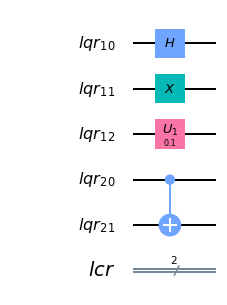

In [31]:
qreg1 = QuantumRegister(3, 'lqr_1')
qreg2 = QuantumRegister(2, 'lqr_2')
creg = ClassicalRegister(2, 'lcr')

circuit_left = QuantumCircuit(qreg1, qreg2, creg)
circuit_left.h(qreg1[0])
circuit_left.x(qreg1[1])
circuit_left.u1(0.1, qreg1[2])
circuit_left.cx(qreg2[0], qreg2[1])

left_qubit0 = qreg1[0]
left_qubit1 = qreg1[1]
left_qubit2 = qreg1[2]
left_qubit3 = qreg2[0]
left_qubit4 = qreg2[1]
left_clbit0 = creg[0]
left_clbit1 = creg[1]
condition = (creg, 3)
circuit_left.draw('mpl')

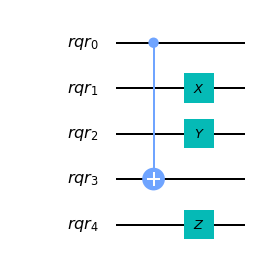

In [36]:
# Composing two circuits of the same width, default order.
qreg = QuantumRegister(5, 'rqr')
circuit_right = QuantumCircuit(qreg)
circuit_right.cx(qreg[0], qreg[3])
circuit_right.x(qreg[1])
circuit_right.y(qreg[2])
circuit_right.z(qreg[4])
circuit_right.draw('mpl')

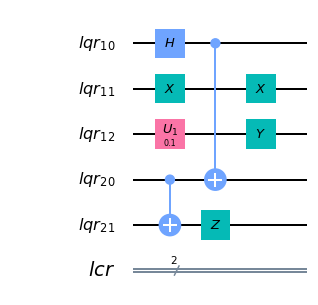

In [37]:
circuit_expected = circuit_left.copy()
circuit_expected.cx(left_qubit0, left_qubit3)
circuit_expected.x(left_qubit1)
circuit_expected.y(left_qubit2)
circuit_expected.z(left_qubit4)
circuit_expected.draw('mpl')

In [38]:
print(circuit_expected.depth())

2


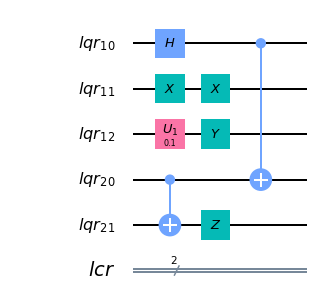

In [39]:
circuit_composed = circuit_left.compose(circuit_right, inplace=False)
circuit_composed.draw('mpl')

In [42]:
print(circuit_composed.depth())

2


In [43]:
print(circuit_composed == circuit_expected)

True


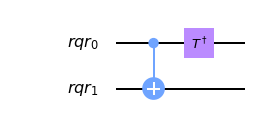

In [48]:
qreg = QuantumRegister(2, 'rqr')

circuit_right = QuantumCircuit(qreg)
circuit_right.cx(qreg[0], qreg[1])
circuit_right.tdg(qreg[0])
circuit_right.draw('mpl')

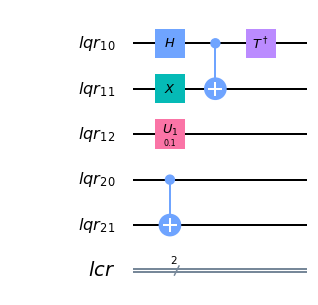

In [49]:
circuit_expected = circuit_left.copy()
circuit_expected.cx(left_qubit0, left_qubit1)
circuit_expected.tdg(left_qubit0)
circuit_expected.draw('mpl')

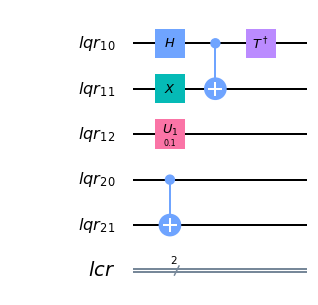

In [50]:
circuit_composed = circuit_left.compose(circuit_right)
circuit_expected.draw('mpl')

In [51]:
print(circuit_composed == circuit_expected)

True


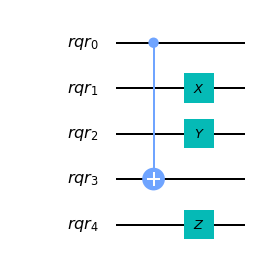

In [54]:
# Composing two circuits of the same width, permuted wires.
qreg = QuantumRegister(5, 'rqr')

circuit_right = QuantumCircuit(qreg)
circuit_right.cx(qreg[0], qreg[3])
circuit_right.x(qreg[1])
circuit_right.y(qreg[2])
circuit_right.z(qreg[4])
circuit_right.draw('mpl')

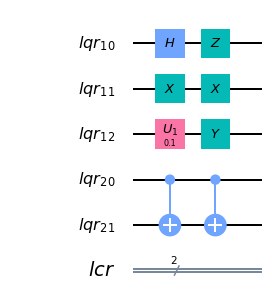

In [55]:
circuit_expected = circuit_left.copy()
circuit_expected.z(left_qubit0)
circuit_expected.x(left_qubit1)
circuit_expected.y(left_qubit2)
circuit_expected.cx(left_qubit3, left_qubit4)
circuit_expected.draw('mpl')

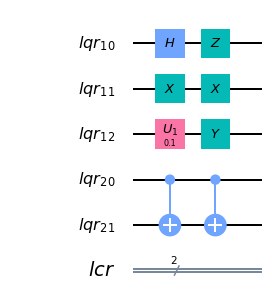

In [56]:
# permuted wiring
circuit_composed = circuit_left.compose(circuit_right,
                                             qubits=[left_qubit3,
                                                     left_qubit1,
                                                     left_qubit2,
                                                     left_qubit4,
                                                     left_qubit0],
                                             inplace=False)
circuit_composed.draw('mpl')

In [57]:
print(circuit_composed==circuit_expected)

True


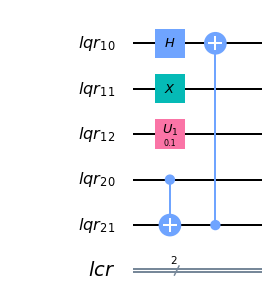

In [28]:
# Composing with a gate.
circuit_composed = circuit_left.compose(CXGate(), qubits=[4, 0])
circuit_composed.draw('mpl')

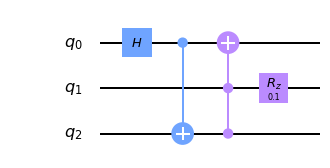

In [29]:
# Build a circuit in one line
circ = QuantumCircuit(3)
h = HGate()
rz = RZGate(0.1)
cx = CXGate()
ccx = CCXGate()
circ = circ.compose(h, [0]).compose(cx, [0, 2]).compose(ccx, [2, 1, 0]).compose(rz, [1])
circ.draw('mpl')